In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('bank-additional.csv')

In [2]:
cat_to_code = data.select_dtypes(['object']).astype('category').apply(lambda x: x.cat.codes)
data[list(cat_to_code)] = cat_to_code
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [3]:
data = data.sample(frac=1)
data.head()

import numpy as np

# this sets the numpy to print numbers with float precision (this setting affects only the prints not the actual values)
np.set_printoptions(suppress=True)

xs, ys = np.split(data.values, [20], axis=1)

n_train = len(xs) * 80 // 100
xs_train, xs_test = np.split(xs, [n_train], axis=0)
ys_train, ys_test = np.split(ys, [n_train], axis=0)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)
print('training set Y shape:\t', ys_train.shape)
print('test set Y shape:\t', ys_test.shape)

training set shape:	 (3295, 20)
test set shape:		 (824, 20)
training set Y shape:	 (3295, 1)
test set Y shape:	 (824, 1)


In [4]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 10)
tree_clf.fit(xs_train, ys_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(136.0613901869159, 207.55636363636364, 'X[19] <= 5087.65\nentropy = 0.493\nsamples = 3295\nvalue = [2940, 355]'),
 Text(49.93317757009346, 187.7890909090909, 'X[10] <= 165.5\nentropy = 0.985\nsamples = 424\nvalue = [243, 181]'),
 Text(18.252336448598133, 168.0218181818182, 'X[10] <= 114.5\nentropy = 0.582\nsamples = 151\nvalue = [130, 21]'),
 Text(6.257943925233645, 148.25454545454545, 'X[16] <= 92.45\nentropy = 0.295\nsamples = 77\nvalue = [73, 4]'),
 Text(4.17196261682243, 128.48727272727274, 'X[11] <= 1.5\nentropy = 0.579\nsamples = 29\nvalue = [25, 4]'),
 Text(2.085981308411215, 108.72, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(6.257943925233645, 108.72, 'X[3] <= 5.5\nentropy = 0.863\nsamples = 14\nvalue = [10, 4]'),
 Text(4.17196261682243, 88.95272727272729, 'X[13] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(2.085981308411215, 69.18545454545455, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(6.257943925233645, 69.18545454545455, 'X[12] <= 5

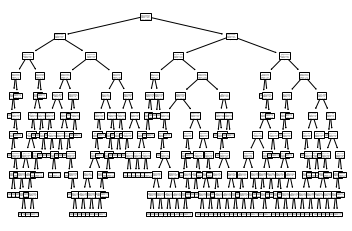

In [5]:
from sklearn.tree import plot_tree
plot_tree(tree_clf)

In [6]:
from sklearn.metrics import accuracy_score
ys_train_pred = tree_clf.predict(xs_train)

print("The train accuracy is " , accuracy_score(ys_train, ys_train_pred))

ys_test_pred = tree_clf.predict(xs_test)

print("The test accuracy is " , accuracy_score(ys_test, ys_test_pred))

The train accuracy is  0.9690440060698027
The test accuracy is  0.8822815533980582
